### Task 2.9 

$Q$ : Derive a Crank-Nicolson scheme in this case ($D(x)$), implement it and solve the problems again with a constant diffusivity, and a step profile of diffusivity.

$A$ :

Derivation is on Good Notes


Hier ist noch was kaputt, wenn die distr. sich von rechts nach links bewegt (größeres D zu niedrieges D verliert es an Masse, in die gegenrichtung gewinnt es masse)

In [1]:
# codebase to generate values
import simulation as sim
import analytical as analy

# codebase to plot stuff
import plots as pl 

alpha = 0.05
Please note, my alpha differs by a factor of 1/2 from the alpha from the lecture.
alpha lecture / 2 = my used alpha  
I adjusted this due to my derivation for Task 2.9 and to make alpha more comparable.


In [2]:
# config file
import config as c

In [10]:
# used to update module
import importlib
importlib.reload(pl);

In [4]:
# Start with simulation

# all combinations: 
boundary_conditions = ["neumann", "dirichlet"]
distributions = ["dirac",]
diags_gen = ["general"]
d_func = ["constant", "step"]

# Simulations
U_sims = [
    [],
    [],
]
for dist in distributions:
    for dia_g in diags_gen:
        for d_f in d_func:
            for i,bc in enumerate(boundary_conditions):
                U_sims[i].append(sim.Simulation(
                        distribution       = dist,
                        diags_gen          = dia_g,
                        d_func             = d_f,
                        boundary_condition = bc, 
                        ))
for i,bc in enumerate(boundary_conditions):
    U_sims[i].append(sim.Simulation(
        distribution       = "dirac",
        diags_gen          = "simpel",
        d_func             = "constant",
        boundary_condition = bc, 
        ))

In [5]:
import importlib
importlib.reload(analy);
# Analytical solutions
boundary_conditions = ["Neumann", "Dirichlet"]
U = analy.analytical_solution_stepped(c.x_g,c.t_g)
u_analy_data_dict =  { 
    "U": U,
    "title": "anly. sol. stepped"
    }
U_analy = sim.Simulation(overwrite=True,data_dict=u_analy_data_dict)
# append both to neumann and dirichlet boundary conditons
for i in [0,1]:
    U_sims[i].append(U_analy)

/Users/leolux/projects/computational_physics_course/assignement_1/task_2/analytical.py:71: RuntimeWarning: invalid value encountered in divide
  return sc.special.erf(c.x_0/np.sqrt(4*t*d))
/Users/leolux/projects/computational_physics_course/assignement_1/task_2/analytical.py:76: RuntimeWarning: invalid value encountered in divide
  return np.exp((d_p-d_m)*c.x_0**2/(4*d_p*d_m*t))
/Users/leolux/projects/computational_physics_course/assignement_1/task_2/analytical.py:100: RuntimeWarning: divide by zero encountered in divide
  return np.exp(-1* (x-c.x_0)**2/(4*d*t))
/Users/leolux/projects/computational_physics_course/assignement_1/task_2/analytical.py:100: RuntimeWarning: invalid value encountered in divide
  return np.exp(-1* (x-c.x_0)**2/(4*d*t))


In [6]:
# Neumann
pl.sketches(U_sims[0])

interactive(children=(IntSlider(value=25000, description='t', max=50000, step=100), Output()), _dom_classes=('…

In [7]:
# Dirac
pl.sketches(U_sims[1])

interactive(children=(IntSlider(value=25000, description='t', max=50000, step=100), Output()), _dom_classes=('…

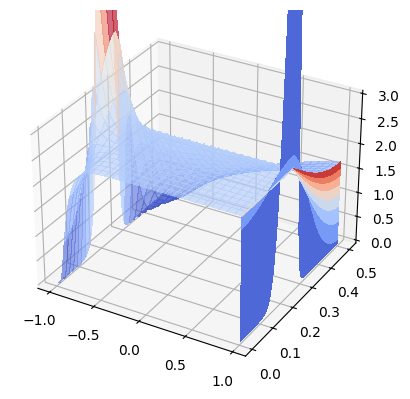

In [11]:
import importlib
importlib.reload(pl);
pl.plot_3d(U_sims[0][1])

In [9]:
import numpy as np

for U in U_sims[0]:
    print(np.sum(U.U[-1]))

100.49280520000373
444.0991707892432
100.49280520000373
146.07814018081433
